In [59]:
import os 
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT +  "datasets/housing/housing.tgz"

# a function to fetch the data
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [60]:
import pandas as pd

# Loading Housing Data
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [61]:
housing = load_housing_data()

# general info about the data
# general_info = housing.info()


# getting first few elements
# head = housing.head()
# print(head)


# print(housing["ocean_proximity"].value_counts())

# summary of each numerical attribute
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [62]:
%matplotlib inline
import matplotlib.pyplot as plt


# we can plot a histogram for each numerical attribute
# housing.hist(bins=50, figsize=(20,15))
# plt.show()

In [63]:
import numpy as np

# creating a test set
# def split_train_test(data, test_ratio):
#     shuffled_indices = np.random.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled_indices[: test_set_size]
#     train_indices = shuffled_indices[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]


# train_set, test_set = split_train_test(housing, 0.2)

# print(f"Train Set shape: {len(train_set)}") #16512
# print(f"Test Set shape: {len(test_set)}") #4128

In [64]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state=42)

print(f"Train Set shape: {len(train_set)}") #16512
print(f"Test Set shape: {len(test_set)}") #4128

Train Set shape: 16512
Test Set shape: 4128


In [65]:
# Stratified Sampling using median income as an important feature
housing["income_cat"] = pd.cut(housing["median_income"], 
                               bins=[0, 1.5, 3.0, 4.5, 6., np.inf], 
                               labels=[1,2,3,4,5,])

<Axes: >

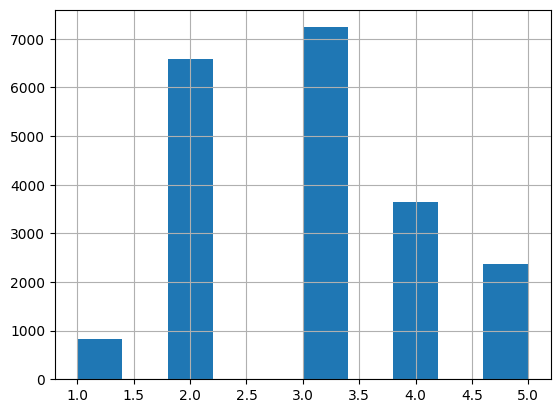

In [66]:
housing["income_cat"].hist()


In [67]:
# Now we can do stratified sampling based on the income category
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)


for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
# print(f"Strat Train shape: {strat_train_set.shape}\nStrat Test shape: {strat_test_set.shape}")

# Income category proportion in the train set
# print(strat_train_set["income_cat"].value_counts() / len(strat_train_set))

# Income category proportion in the test set
# print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))


    

In [68]:
# Now we should remove the income_cat
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)


In [88]:
# Visualizing Data

# Geographical Data
housing = strat_train_set.copy()
# housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
# plt.show()

In [87]:
# More detailed visualization
# s indicates the size of the population
# c color of the median income
# plt.close()
# housing.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.4, 
#                 s=housing["population"]/100, label="population", figsize=(10,7),
#                 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
#             )
# plt.legend()
# plt.show()

In [86]:
# looking for correlations
# corr values ranges from -1 to 1
# corr close to 1 - means there is a strong +ve correlation
# corr close to -1 - means there is a strong -ve correlation
# corr close to 0 - means there is no linear correlation
corr_matrix = housing.corr(numeric_only=True)
print(corr_matrix["median_house_value"].sort_values(ascending=False))



median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64


In [99]:
# using pandas scatter-matrix() to get correlation among most important features
from pandas.plotting import scatter_matrix

# attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
# scatter_matrix(housing[attributes], figsize=(12,8))
# plt.show()

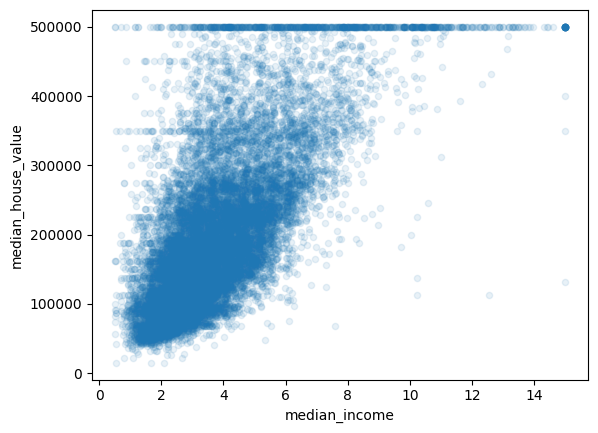

In [110]:
# The most important correlation is among median_income and median_house_value

housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.show()

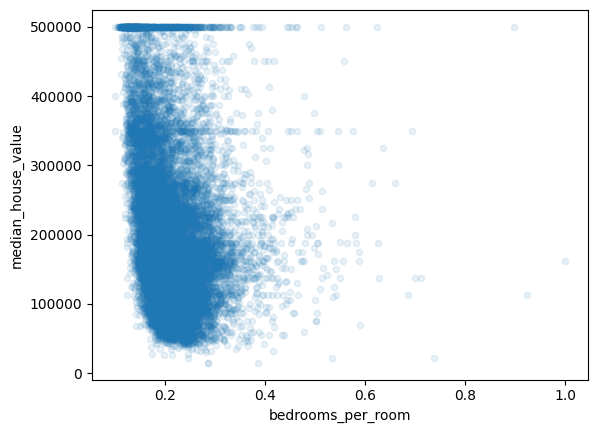

In [111]:
# Attribute combination for better correlation with target value
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

housing.plot(kind="scatter", x="bedrooms_per_room", y="median_house_value", alpha=0.1)
plt.show()